In [19]:
%load_ext autoreload
%autoreload 2

from datasets import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Import and time synthetic data
X, y = import_synthetic()

In [5]:
# Time how long it takes to import synthetic data
%timeit import_synthetic()

480 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# Get dataset length
len(X), len(y)

(1200, 1200)

In [7]:
# Set dataset number
DSN = 90

In [8]:
X[DSN].head()

,case,step,susceptible,c_infected,recovered,dead
32609,BA-4-400015,0,3996,4,0,0
32610,BA-4-400015,1,3996,4,0,0
32611,BA-4-400015,2,3996,4,0,0
32612,BA-4-400015,3,3996,4,0,0
32613,BA-4-400015,4,3996,4,0,0


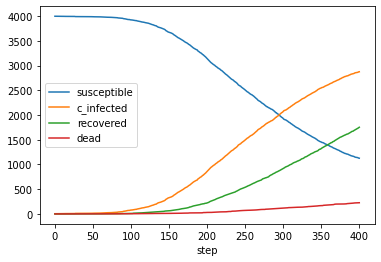

case                BA-4-400015
population                 4000
initial_infected              4
infectiousness        0.0465237
i_out                 0.0914849
i_rec_prop             0.889917
network                      BA
k                             4
Name: 90, dtype: object

In [9]:
# Plot time series data
ax_x = 'step'
ax_y = ['susceptible', 'c_infected', 'recovered', 'dead']
df = X[DSN][[ax_x] + ax_y]
df.plot(x=ax_x)
plt.show()

# Show features
y.iloc[DSN]

In [13]:
# Format X[DSN] and y[DSN] as ndarrays (to be passed to machine learning library)
Xn, yn = synthetic_numpy(X, y)

Xn[DSN], yn[DSN], Xn[DSN].dtype, yn[DSN].dtype

(array([[   0, 3996,    4,    0,    0],
        [   1, 3996,    4,    0,    0],
        [   2, 3996,    4,    0,    0],
        ...,
        [ 398, 1138, 2862, 1730,  225],
        [ 399, 1129, 2871, 1740,  226],
        [ 400, 1126, 2874, 1752,  226]]),
 array([3.        , 1.        , 0.04652369, 0.09148487, 0.889917  ,
        0.        , 0.        ]),
 dtype('int64'),
 dtype('float64'))

In [11]:
# Time how long synthetic_numpy takes
%timeit synthetic_numpy(X, y)

179 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
# Time how long it takes to iterate through whole dataset
%timeit for x, y in zip(Xt, yt): pass

196 µs ± 5.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


{'mean': 329.81666666666666, 'median': 401.0, 'std': 112.36759492348712}

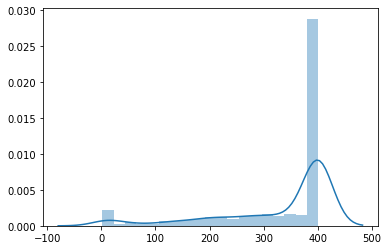

In [22]:
# Get distribution of lengths in time-series data
len_dist = length_distribution(Xn)

# Plot distribution
sns.distplot(len_dist)

# Summary statistics
{"mean": len_dist.mean(), "median": np.median(len_dist), "std": len_dist.std()}